<a href="https://colab.research.google.com/github/bskhung/Data-Project/blob/main/Detecting_Diabetes_in_Early_Stage(Final).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving diabetes_data_upload.xlsx to diabetes_data_upload (3).xlsx


In [ ]:
import io
df = pd.read_excel(io.BytesIO(uploaded['diabetes_data_upload.xlsx']))
df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [ ]:
df.dtypes

Age                    int64
Gender                object
Polyuria              object
Polydipsia            object
sudden weight loss    object
weakness              object
Polyphagia            object
Genital thrush        object
visual blurring       object
Itching               object
Irritability          object
delayed healing       object
partial paresis       object
muscle stiffness      object
Alopecia              object
Obesity               object
class                 object
dtype: object

In [ ]:
print(df.isnull().values.any())

False


There are no missing values.

In [ ]:
df.info

<bound method DataFrame.info of      Age  Gender Polyuria  ... Alopecia Obesity     class
0     40    Male       No  ...      Yes     Yes  Positive
1     58    Male       No  ...      Yes      No  Positive
2     41    Male      Yes  ...      Yes      No  Positive
3     45    Male       No  ...       No      No  Positive
4     60    Male      Yes  ...      Yes     Yes  Positive
..   ...     ...      ...  ...      ...     ...       ...
515   39  Female      Yes  ...       No      No  Positive
516   48  Female      Yes  ...       No      No  Positive
517   58  Female      Yes  ...       No     Yes  Positive
518   32  Female       No  ...      Yes      No  Negative
519   42    Male       No  ...       No      No  Negative

[520 rows x 17 columns]>

In [ ]:
df.describe(include='object')

,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
count,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,Male,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,Positive
freq,328,262,287,303,305,283,404,287,267,394,281,296,325,341,432,320


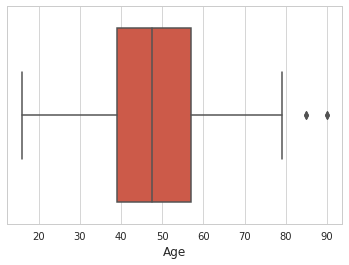

In [ ]:
import seaborn as sns
sns.boxplot(x=df['Age'])

Any age over 80 are outliers. We can proceed to remove them.

In [ ]:
df_new = df.drop(df[df.Age > 80].index)

In [ ]:
df_new.describe

<bound method NDFrame.describe of      Age  Gender Polyuria  ... Alopecia Obesity     class
0     40    Male       No  ...      Yes     Yes  Positive
1     58    Male       No  ...      Yes      No  Positive
2     41    Male      Yes  ...      Yes      No  Positive
3     45    Male       No  ...       No      No  Positive
4     60    Male      Yes  ...      Yes     Yes  Positive
..   ...     ...      ...  ...      ...     ...       ...
515   39  Female      Yes  ...       No      No  Positive
516   48  Female      Yes  ...       No      No  Positive
517   58  Female      Yes  ...       No     Yes  Positive
518   32  Female       No  ...      Yes      No  Negative
519   42    Male       No  ...       No      No  Negative

[516 rows x 17 columns]>

Rows with the outliers are removed and dataset is renamed to be df_new

First, I will try to deploy classification algorithm but I will convert all the string value to numerical value first

In [ ]:
df_new.describe(include='object')

,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
count,516,516,516,516,516,516,516,516,516,516,516,516,516,516,516,516
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,Male,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,Positive
freq,326,260,287,303,303,281,404,287,267,390,279,294,325,339,428,316


In [ ]:
d = {'Male': 1, 'Female': 0}
df_new['Gender'] = df_new['Gender'].map(d)
d = {'Yes': 1, 'No': 0}
df_new['Polyuria'] = df_new['Polyuria'].map(d)
df_new['Polydipsia'] = df_new['Polydipsia'].map(d)
df_new['sudden weight loss'] = df_new['sudden weight loss'].map(d)
df_new['weakness'] = df_new['weakness'].map(d)
df_new['Polyphagia'] = df_new['Polyphagia'].map(d)
df_new['Genital thrush'] = df_new['Genital thrush'].map(d)
df_new['visual blurring'] = df_new['visual blurring'].map(d)
df_new['Itching'] = df_new['Itching'].map(d)
df_new['Irritability'] = df_new['Irritability'].map(d)
df_new['delayed healing'] = df_new['delayed healing'].map(d)
df_new['partial paresis'] = df_new['partial paresis'].map(d)
df_new['muscle stiffness'] = df_new['muscle stiffness'].map(d)
df_new['Alopecia'] = df_new['Alopecia'].map(d)
df_new['Obesity'] = df_new['Obesity'].map(d)
d = {'Positive': 1, 'Negative': 0}
df_new['class'] = df_new['class'].map(d)
df_new


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


Let's do some more visualization on the data

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


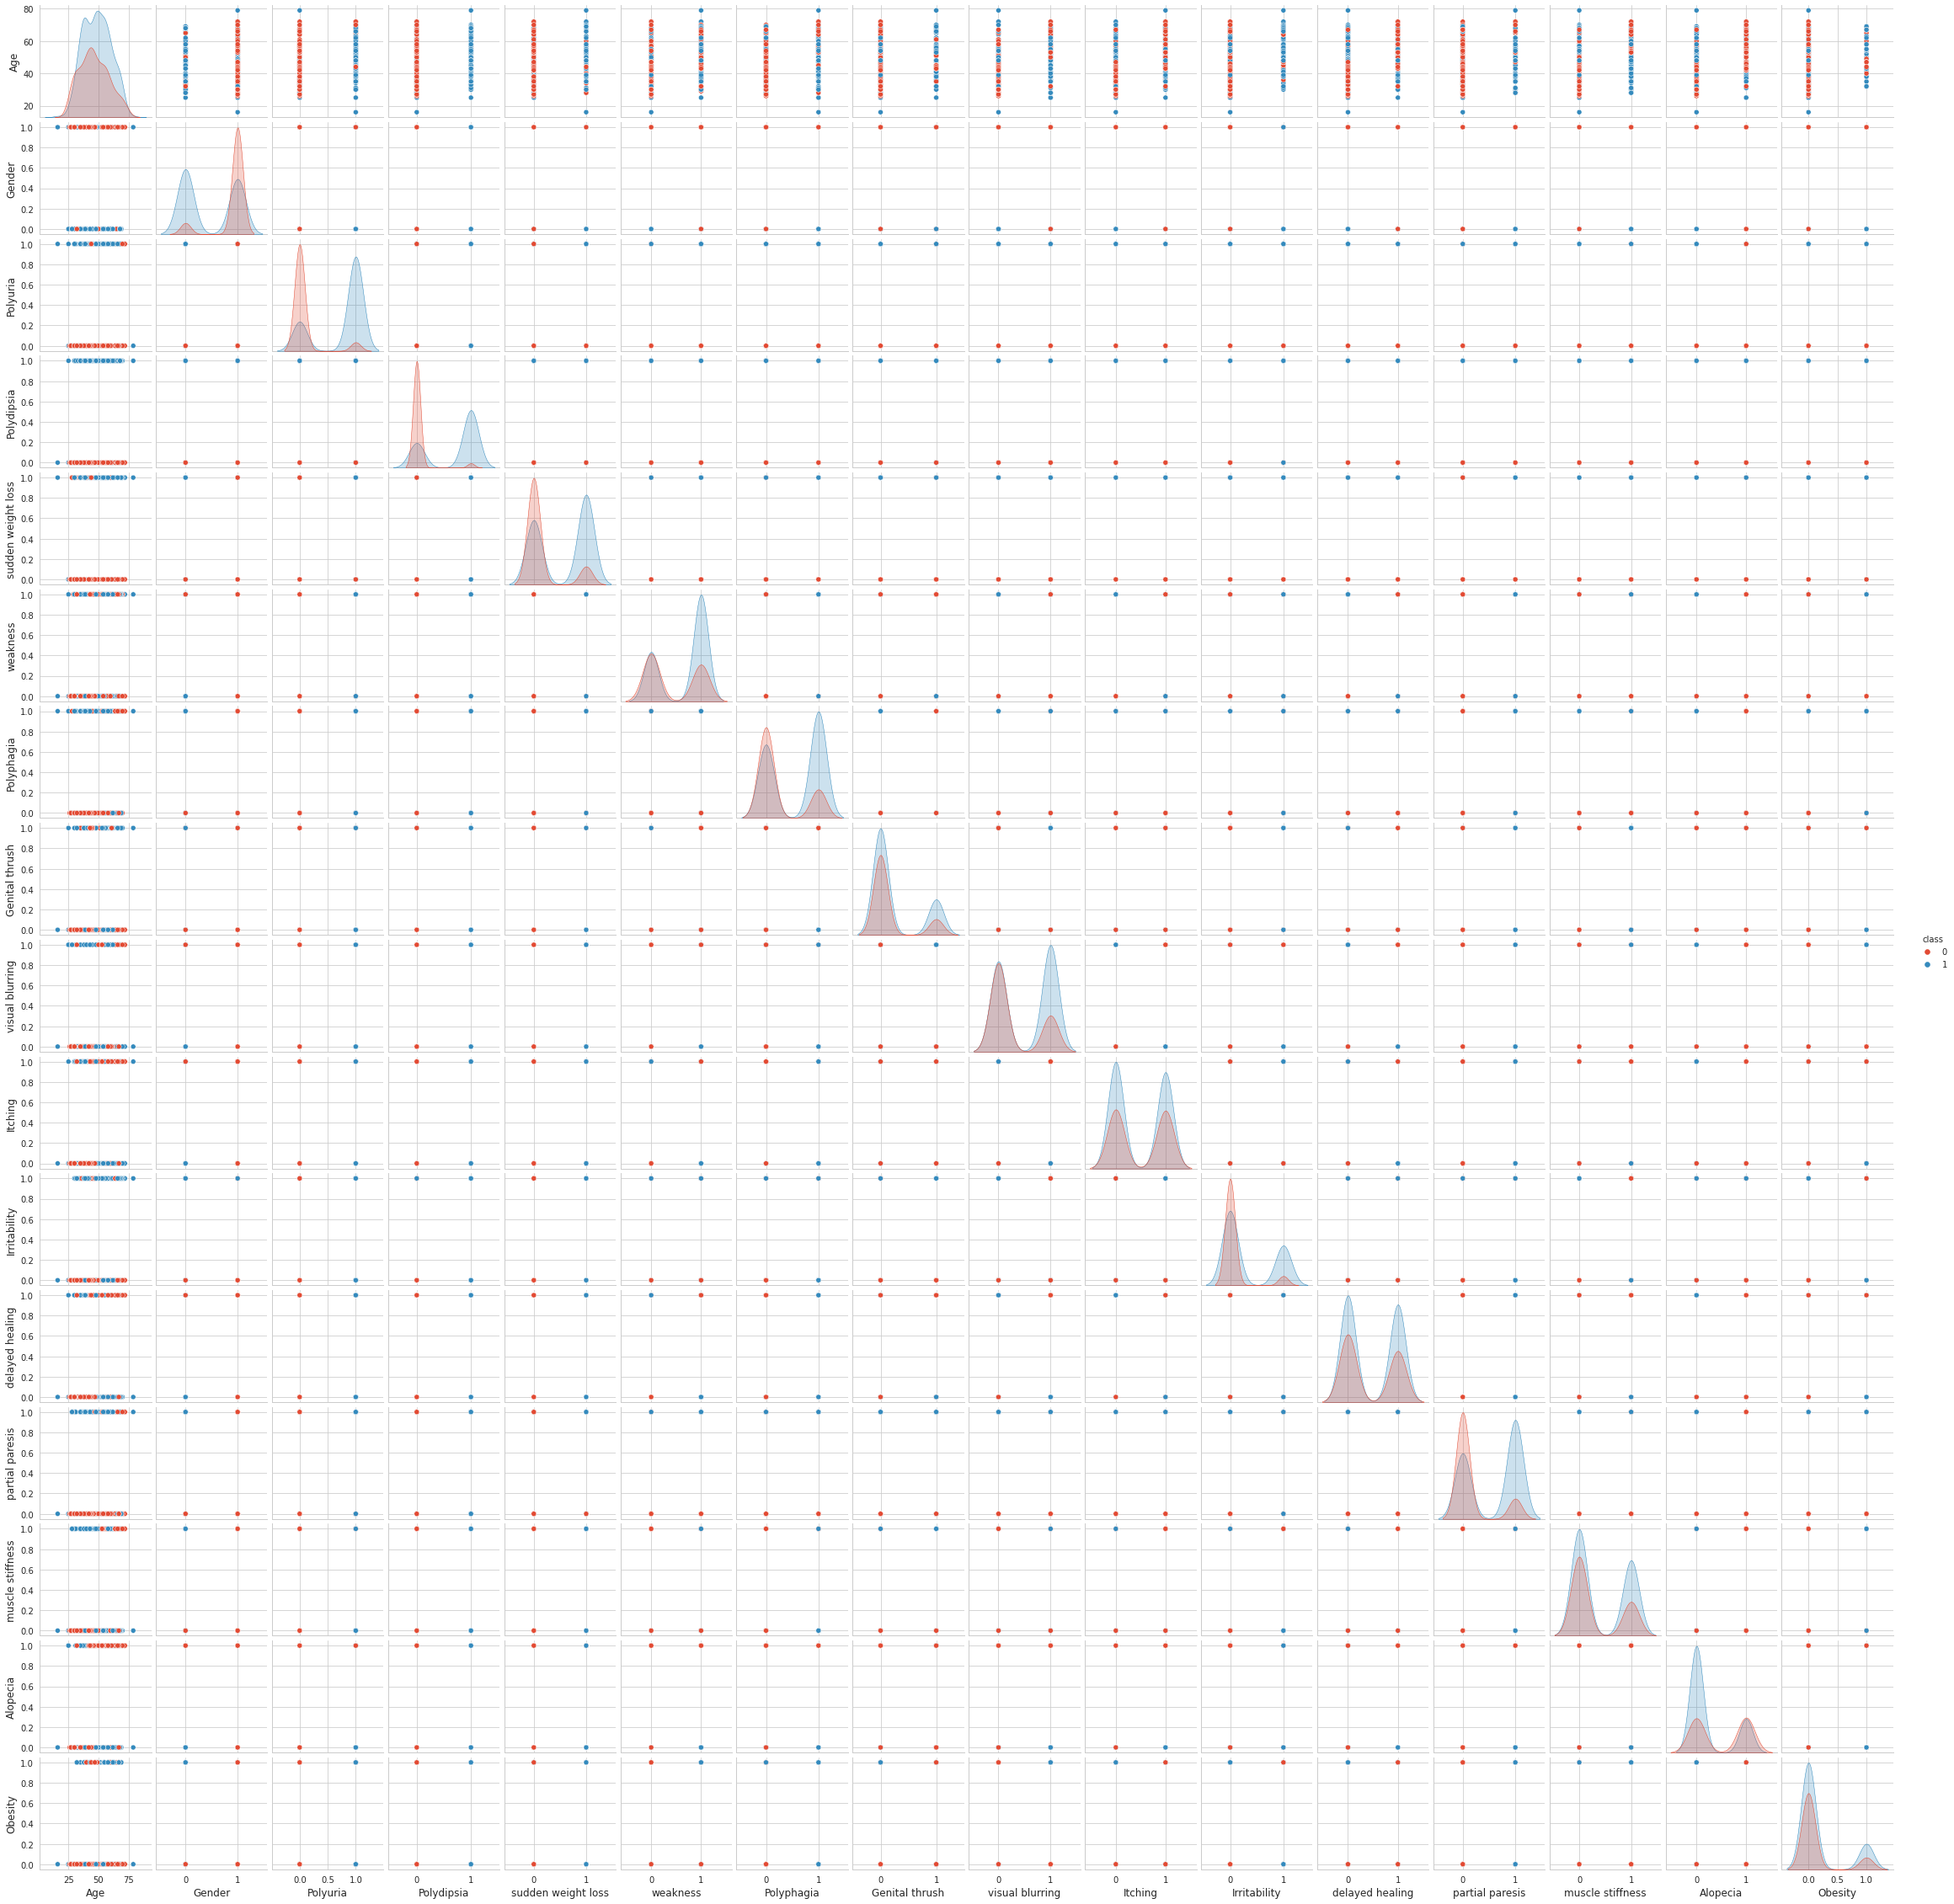

In [ ]:
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
sns.pairplot(data=df_new, hue = 'class', size=2)
plt.show()

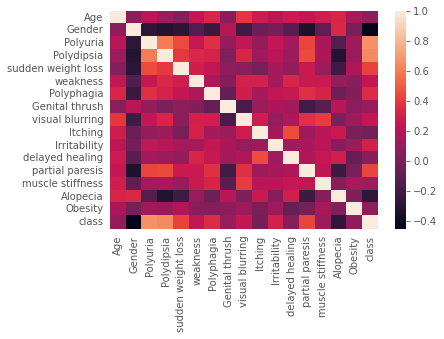

In [ ]:
sns.heatmap(df_new.corr())

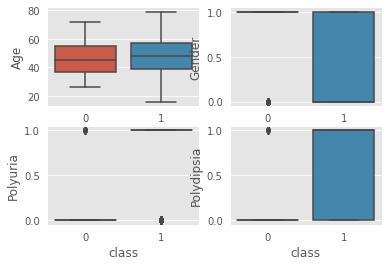

In [ ]:
plt.style.use('ggplot')
plt.subplot(2,2,1)
sns.boxplot(x = 'class', y = 'Age', data = df_new)
plt.subplot(2,2,2)
sns.boxplot(x = 'class', y = 'Gender', data = df_new)
plt.subplot(2,2,3)
sns.boxplot(x = 'class', y = 'Polyuria', data = df_new)
plt.subplot(2,2,4)
sns.boxplot(x = 'class', y = 'Polydipsia', data = df_new)

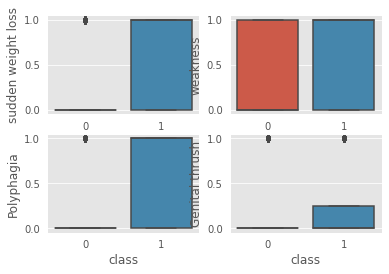

In [ ]:
plt.subplot(2,2,1)
sns.boxplot(x = 'class', y = 'sudden weight loss', data = df_new)
plt.subplot(2,2,2)
sns.boxplot(x = 'class', y = 'weakness', data = df_new)
plt.subplot(2,2,3)
sns.boxplot(x = 'class', y = 'Polyphagia', data = df_new)
plt.subplot(2,2,4)
sns.boxplot(x = 'class', y = 'Genital thrush', data = df_new)

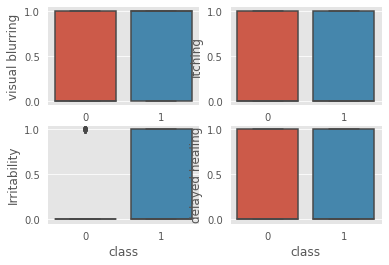

In [ ]:
plt.subplot(2,2,1)
sns.boxplot(x = 'class', y = 'visual blurring', data = df_new)
plt.subplot(2,2,2)
sns.boxplot(x = 'class', y = 'Itching', data = df_new)
plt.subplot(2,2,3)
sns.boxplot(x = 'class', y = 'Irritability', data = df_new)
plt.subplot(2,2,4)
sns.boxplot(x = 'class', y = 'delayed healing', data = df_new)

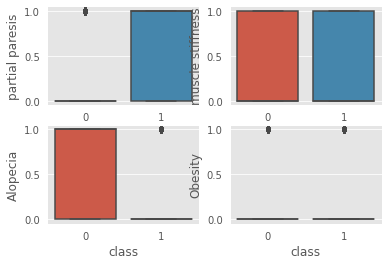

In [ ]:
plt.subplot(2,2,1)
sns.boxplot(x = 'class', y = 'partial paresis', data = df_new)
plt.subplot(2,2,2)
sns.boxplot(x = 'class', y = 'muscle stiffness', data = df_new)
plt.subplot(2,2,3)
sns.boxplot(x = 'class', y = 'Alopecia', data = df_new)
plt.subplot(2,2,4)
sns.boxplot(x = 'class', y = 'Obesity', data = df_new)

Going to prepare for the decision tree

In [ ]:
X = df_new.drop(['class'], axis=1)
X

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0


In [ ]:
Y = df_new['class'] 
Y

0      1
1      1
2      1
3      1
4      1
      ..
515    1
516    1
517    1
518    0
519    0
Name: class, Length: 516, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=1)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(x_train, y_train)

In [ ]:
from sklearn import tree

[Text(239.47500000000002, 206.56799999999998, 'X[2] <= 0.5\ngini = 0.476\nsamples = 345\nvalue = [135, 210]'),
 Text(177.2166666666667, 184.824, 'X[3] <= 0.5\ngini = 0.431\nsamples = 178\nvalue = [122, 56]'),
 Text(102.30000000000001, 163.07999999999998, 'X[1] <= 0.5\ngini = 0.347\nsamples = 148\nvalue = [115, 33]'),
 Text(53.73333333333334, 141.336, 'X[14] <= 0.5\ngini = 0.482\nsamples = 37\nvalue = [15, 22]'),
 Text(33.06666666666667, 119.592, 'X[0] <= 34.5\ngini = 0.269\nsamples = 25\nvalue = [4, 21]'),
 Text(16.533333333333335, 97.848, 'X[0] <= 30.5\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(8.266666666666667, 76.10399999999998, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(24.800000000000004, 76.10399999999998, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(49.60000000000001, 97.848, 'X[10] <= 0.5\ngini = 0.095\nsamples = 20\nvalue = [1, 19]'),
 Text(41.333333333333336, 76.10399999999998, 'gini = 0.0\nsamples = 19\nvalue = [0, 19]'),
 Text(57.866666666666674, 76.103

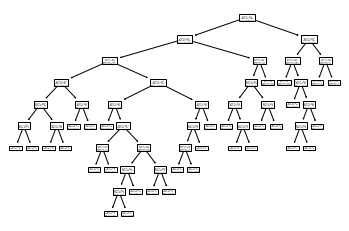

In [ ]:
tree.plot_tree(dtree)

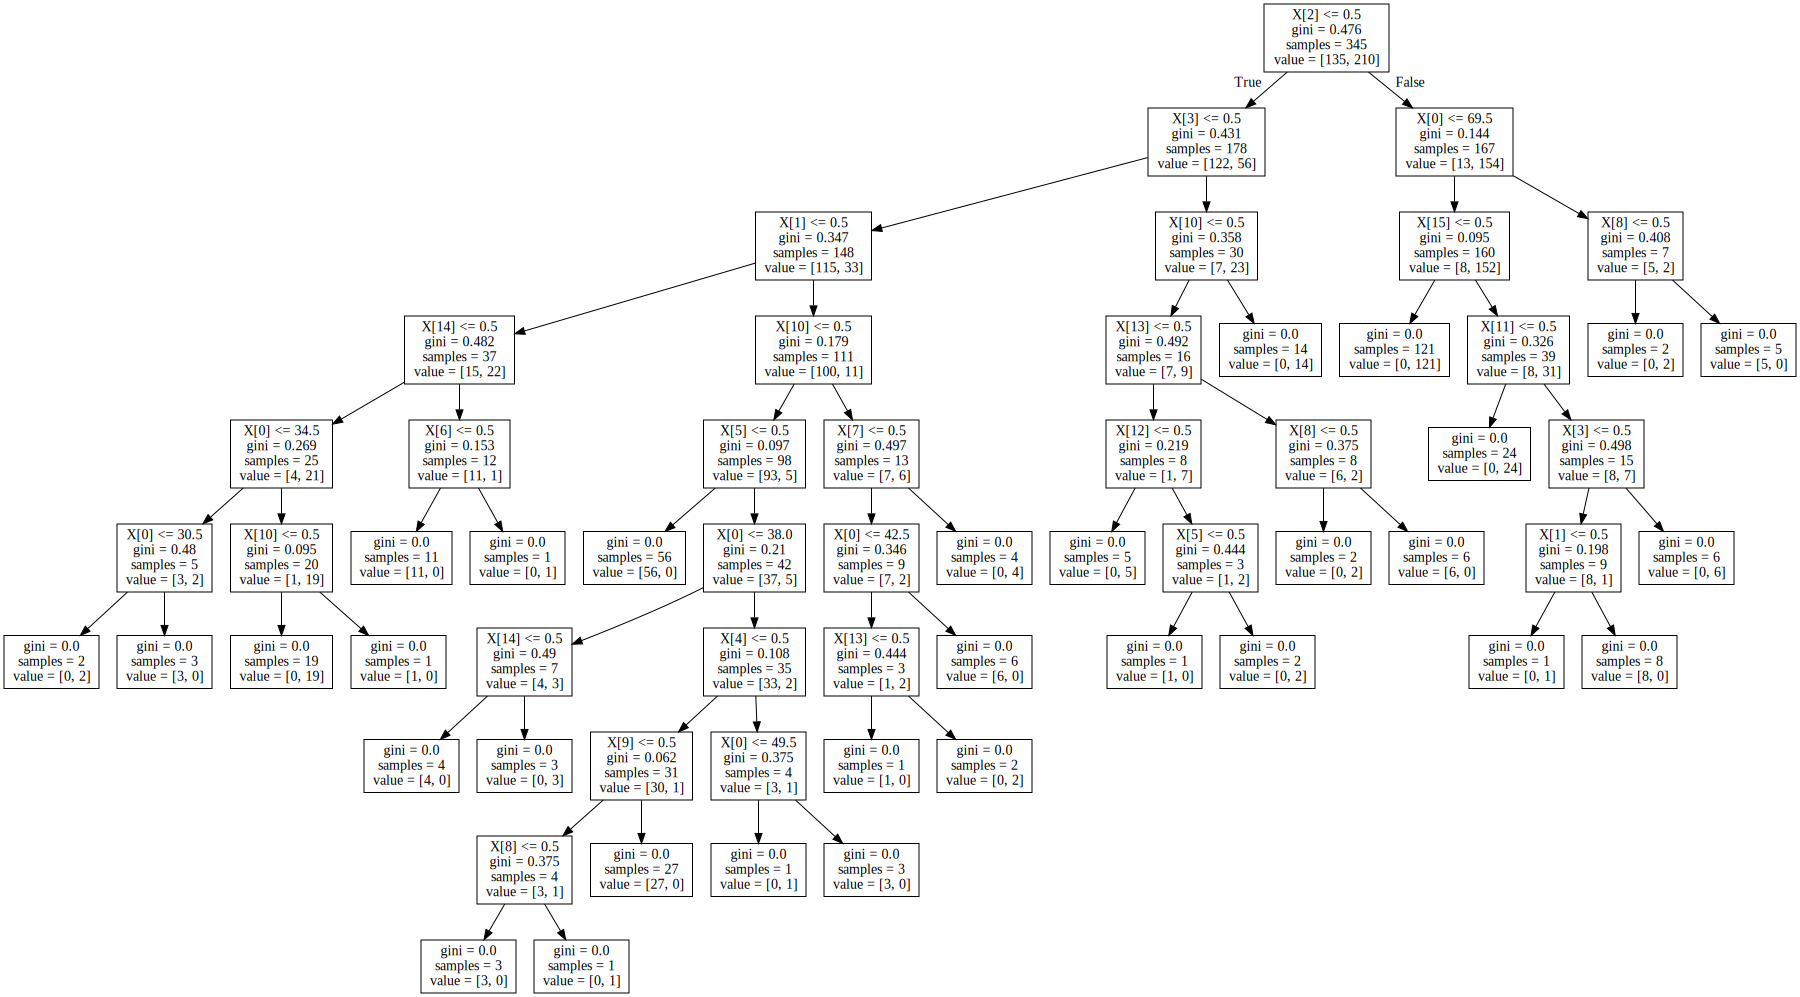

In [ ]:
import graphviz 
dot_data = tree.export_graphviz(dtree, out_file=None) 
graph = graphviz.Source(dot_data)
graph

In [ ]:
y_pred = dtree.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

We test for accuracy of model.

In [ ]:
print("Accuracy for Simple Classification Tree:",accuracy_score(y_test, y_pred))

Accuracy: 0.9883040935672515


We will try using Random Forest classifer to see compare the accuracy since it is an extension of decision tree with more complication 

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier(random_state=1)

In [ ]:
model.fit(x_train, y_train)

RandomForestClassifier(random_state=1)

In [ ]:
y_pred2 = model.predict(x_test)

In [ ]:
print("Accuracy for Random Forest:",accuracy_score(y_test, y_pred))

Accuracy for Random Forest: 0.9883040935672515


Since the two accuracy is the same. I believe the first decision tree was the final decision tree Random Forest Classifier chose as the best decision tree.

Now we will look at confusion matrix.

In [ ]:
confusion_matrix(y_test, y_pred)

array([[ 64,   1],
       [  1, 105]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        65
           1       0.99      0.99      0.99       106

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171



In [ ]:
confusion_matrix(y_test, y_pred2)

array([[ 64,   1],
       [  1, 105]])

In [ ]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        65
           1       0.99      0.99      0.99       106

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171



Now I will try to use Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression


In [ ]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_predreg = logreg.predict(x_test)
print("Accuracy for Logistic Regression:",accuracy_score(y_test, y_predreg))

Accuracy for Logistic Regression: 0.9707602339181286


In [ ]:
confusion_matrix(y_test, y_predreg)

array([[ 63,   2],
       [  3, 103]])

In [ ]:
print(classification_report(y_test, y_predreg))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        65
           1       0.98      0.97      0.98       106

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



We can now compare decision tree vs logistic regression and we can see that using decision tree is a better option